# Sentence Length in Biblical Hebrew - Menzerath's Law

In [1]:
import sys, collections, os
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr  
import numpy as np
sns.set()
import pprint as pp
import math
from matplotlib import pyplot as plt

from scipy import stats

In [2]:
from tf.fabric import Fabric
TF = Fabric(modules='hebrew/etcbc4c')

This is Text-Fabric 4.3.0
Api reference : https://dans-labs.github.io/text-fabric/Api/General/
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

108 features found and 0 ignored


Activate relevant linguistic features

In [3]:
api = TF.load('''
    otype lex language
    typ code function rela det 
    vt vs txt sp mother uvf g_cons
''')

  0.00s loading features ...
   |     0.08s B otype                from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.30s B g_cons               from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.25s B lex                  from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.24s B language             from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.45s B typ                  from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.07s B code                 from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.20s B function             from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.43s B rela                 from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.28s B det                  from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.25s B vt                   from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.25s B vs            

In [4]:
api.loadLog()
api.makeAvailableIn(globals())

   |     0.01s M otext                from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.08s B otype                from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     1.13s B oslots               from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.00s M otext                from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.05s B book                 from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.05s B chapter              from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.02s B verse                from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.30s B g_cons               from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.38s B g_cons_utf8          from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.27s B g_lex                from /Users/jAir/github/text-fabric-data/hebrew/etcbc4c
   |     0.36s B g_lex_utf8           from /Users/jAir/githu

# Sentence length: data collection

In [5]:
sentence_list = []
sentence_dict = {}

number_clauses = []
number_words = []
clause_word_ratio = []

for sen in F.otype.s('sentence'):
    clauses = L.d(sen, 'clause')
    cl_counter = 0
    
    for cl in clauses:
        cl_counter += 1
        
    all_words = L.d(sen, 'word')
    word_counter = 0
    
    for w in all_words:  
        word_counter += 1
        
    info_list = [str(cl)]
    
    where = T.sectionFromNode(cl)
    for elem in where:
        info_list.append(str(elem))
    words = L.d(cl, 'word')
    lang = F.language.v(words[0])
    info_list.append(lang)
    info_list.append(str(cl_counter))
    number_clauses.append(cl_counter)
    info_list.append(str(word_counter))
    number_words.append(word_counter)
    info_list.append(str(word_counter / cl_counter))
    clause_word_ratio.append(word_counter / cl_counter)
    
    sentence_list.append(cl)
    sentence_dict[cl] = info_list

In [6]:
csvh = open('sentence_jarodwords.csv', "w")
header = ['id', 'book', 'chapter', 'verse', 'language', 'sentence_length', 'number_words', 'clause_length']
csvh.write('{}\n'.format(','.join(header)))
for sen in sentence_list:
    line = sentence_dict[sen]
    csvh.write('{}\n'.format(','.join(line)))
    
csvh.close()

In [7]:
sen_len = pd.read_csv('/Users/jAir/Desktop/ipynb/sentence_jarodwords.csv')

In [8]:
narrative = {'Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges', '1_Samuel', '2_Samuel', 
             '1_Kings', '2_Kings', '1_Chronicles', '2_Chronicls', 'Ruth', 'Esther', 'Ezra', 'Nehemiah', 'Jonah', 'Daniel'}

conditions = [
    (sen_len['book'] == 'Genesis'),
    (sen_len['book'] == 'Exodus'),
    (sen_len['book'] == 'Leviticus'),
    (sen_len['book'] == 'Numbers'),
    (sen_len['book'] == 'Deuteronomy'),
    (sen_len['book'] == 'Joshua'),
    (sen_len['book'] == 'Judges'),
    (sen_len['book'] == '1_Samuel'),
    (sen_len['book'] == '2_Samuel'),
    (sen_len['book'] =='1_Kings'),
    (sen_len['book'] =='2_Kings'),
    (sen_len['book'] =='1_Chronicles'),
    (sen_len['book'] =='2_Chronicles'),
    (sen_len['book'] == 'Ruth'),
    (sen_len['book'] =='Esther'),
    (sen_len['book'] =='Ezra'),
    (sen_len['book'] =='Nehemiah'),
    (sen_len['book'] =='Jonah'),
    (sen_len['book'] =='Daniel')]
choices = ['Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative',
          'Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative',]
sen_len['genre'] = np.select(conditions, choices, default = 'Poetry')

In [9]:
sen_len.head(100)

,id,book,chapter,verse,language,sentence_length,number_words,clause_length,genre
0,426582,Genesis,1,1,hbo,1,11,11.000000,Narrative
1,426583,Genesis,1,2,hbo,1,7,7.000000,Narrative
2,426584,Genesis,1,2,hbo,1,5,5.000000,Narrative
3,426585,Genesis,1,2,hbo,1,8,8.000000,Narrative
4,426586,Genesis,1,3,hbo,1,3,3.000000,Narrative
5,426587,Genesis,1,3,hbo,1,2,2.000000,Narrative
6,426588,Genesis,1,3,hbo,1,3,3.000000,Narrative
7,426590,Genesis,1,4,hbo,2,8,4.000000,Narrative
8,426591,Genesis,1,4,hbo,1,10,10.000000,Narrative
9,426592,Genesis,1,5,hbo,1,7,7.000000,Narrative


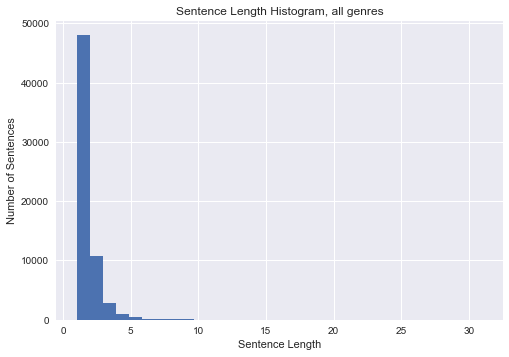

In [10]:
sen_len.hist(column = 'sentence_length', bins = (sen_len['sentence_length'].max()))
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.title('Sentence Length Histogram, all genres')
plt.show()

In [11]:
sen_len_15 = sen_len[sen_len['sentence_length'] < 16]

In [12]:
sen_len_15.head()

,id,book,chapter,verse,language,sentence_length,number_words,clause_length,genre
0,426582,Genesis,1,1,hbo,1,11,11.0,Narrative
1,426583,Genesis,1,2,hbo,1,7,7.0,Narrative
2,426584,Genesis,1,2,hbo,1,5,5.0,Narrative
3,426585,Genesis,1,2,hbo,1,8,8.0,Narrative
4,426586,Genesis,1,3,hbo,1,3,3.0,Narrative


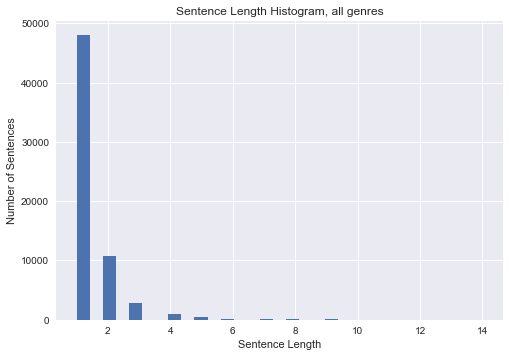

In [13]:
sen_len_15.hist(column = 'sentence_length', bins = (sen_len['sentence_length'].max()))
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.title('Sentence Length Histogram, all genres')
plt.show()

In [14]:
sen_len.groupby('sentence_length').sentence_length.count()

sentence_length
1     48050
2     10810
3      2755
4      1042
5       440
6       201
7       107
8        50
9        49
10       16
11       10
12       11
13        8
14        5
16        1
17        5
18        2
19        1
22        3
23        1
24        1
25        1
31        1
Name: sentence_length, dtype: int64

In [15]:
sen_len_7 = sen_len[sen_len['sentence_length'] < 8]

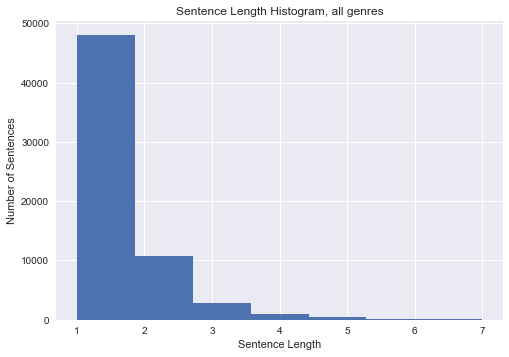

In [16]:
sen_len_7.hist(column = 'sentence_length', bins = 7)
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.title('Sentence Length Histogram, all genres')
plt.show()

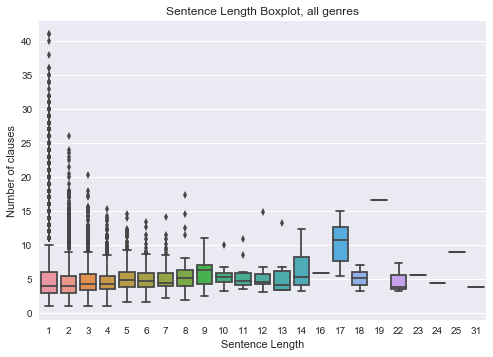

In [17]:
sns.boxplot(x='sentence_length', y='clause_length', data=sen_len)
plt.xlabel('Sentence Length')
plt.ylabel('Number of clauses')
plt.title('Sentence Length Boxplot, all genres')
plt.show()

Make a scatterplot of number_clauses and clause_phrase_ratio

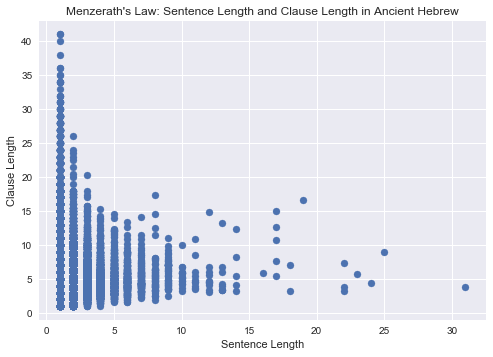

In [18]:
plt.scatter(sen_len.sentence_length, sen_len.clause_length)
plt.title("Menzerath's Law: Sentence Length and Clause Length in Ancient Hebrew")
plt.xlabel("Sentence Length")
plt.ylabel("Clause Length")
plt.show()

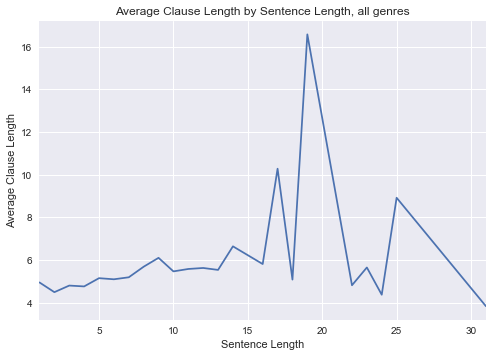

In [19]:
sen_len.clause_length.groupby(sen_len.sentence_length).mean().plot(kind='line')
plt.xlabel('Sentence Length')
plt.ylabel('Average Clause Length')
plt.title('Average Clause Length by Sentence Length, all genres')
plt.show()

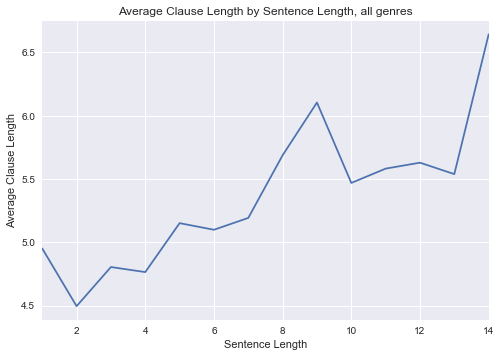

In [20]:
sen_len_15.clause_length.groupby(sen_len.sentence_length).mean().plot(kind='line')
plt.xlabel('Sentence Length')
plt.ylabel('Average Clause Length')
plt.title('Average Clause Length by Sentence Length, all genres')
plt.show()

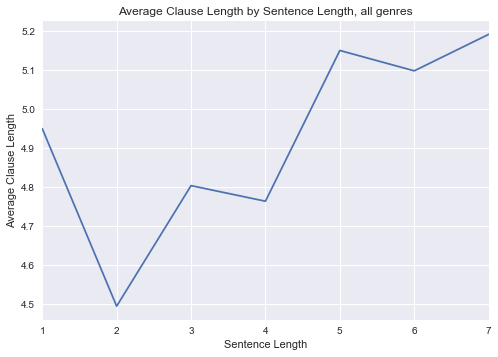

In [21]:
sen_len_7.clause_length.groupby(sen_len.sentence_length).mean().plot(kind='line')
plt.xlabel('Sentence Length')
plt.ylabel('Average Clause Length')
plt.title('Average Clause Length by Sentence Length, all genres')
plt.show()

In [22]:
ma = sen_len_7.clause_length.groupby(sen_len_7.sentence_length).mean()
ma_df = pd.DataFrame(ma)
ma_df.reset_index(level=0, inplace=True)
ma_df.head()

,sentence_length,clause_length
0,1,4.950447
1,2,4.494866
2,3,4.804114
3,4,4.764155
4,5,5.150909


SyL = a·WoL−b

ClL = a*SenL**-b

ClL = a*(1/SenL**b)



In [23]:
from numpy import exp, linspace, random
from lmfit import Model

[[Model]]
    Model(mla)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 7
    # variables        = 2
    chi-square         = 0.26183998
    reduced chi-square = 0.05236800
    Akaike info crit   = -19.0015231
    Bayesian info crit = -19.1097028
[[Variables]]
    a:  4.67236129 +/- 0.18461334 (3.95%) (init = 4.950447)
    b: -0.04246787 +/- 0.02828368 (66.60%) (init = 0.228)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) =  0.896



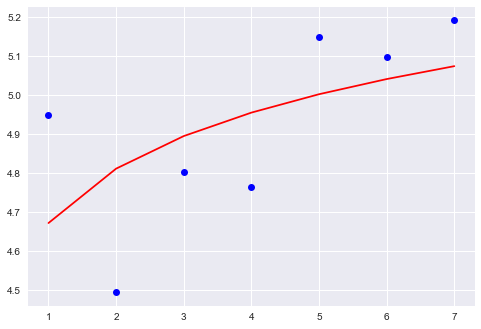

In [24]:
y = ma_df.clause_length
x = ma_df.sentence_length

def mla(x, a, b):
    return (a*(1/x**b))

mlamodel = Model(mla)
result = mlamodel.fit(y, x=x, a=4.950447, b=0.228)

print(result.fit_report())

plt.plot(x, y, 'bo')
plt.plot(x, result.best_fit, 'r-')
plt.show()

In [25]:
a = result.params['a'].value
b = result.params['b'].value

In [26]:
SenLp = []

for n in range(1,32):
    SenLp.append(a*(1/n**-b))

SenLp_df = pd.DataFrame(SenLp)
ma_df['senlp'] = SenLp_df

slope, intercept, r_value, p_value, std_err = stats.linregress(ma_df.clause_length, ma_df.senlp)
print("r-squared:", r_value**2)

r-squared: 0.2898802246136234


Genesis r-squared: 0.12559222234154793
Genesis a: -0.030670836189390746


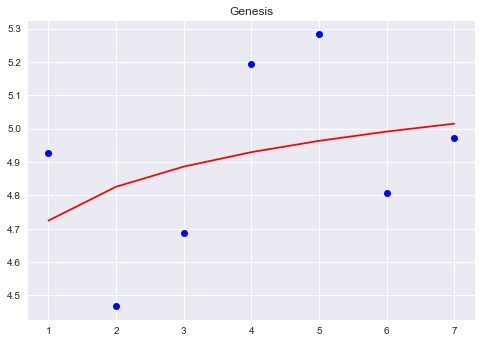

Exodus r-squared: 0.16865281320360018
Exodus a: -0.14056350979104199


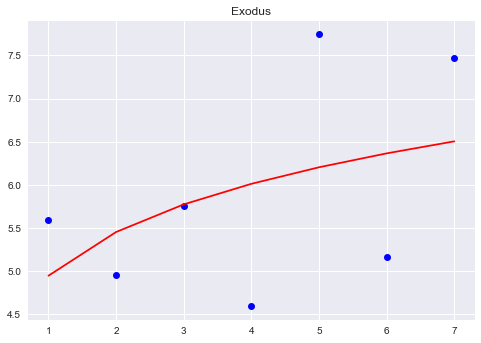

Leviticus r-squared: 0.00034731004528965184
Leviticus a: -0.003642332226259035


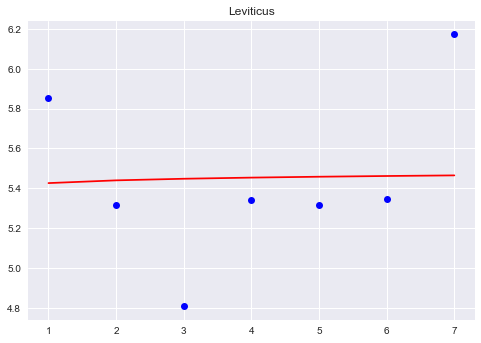

Numbers r-squared: 0.20660286906848574
Numbers a: 0.04965750611026097


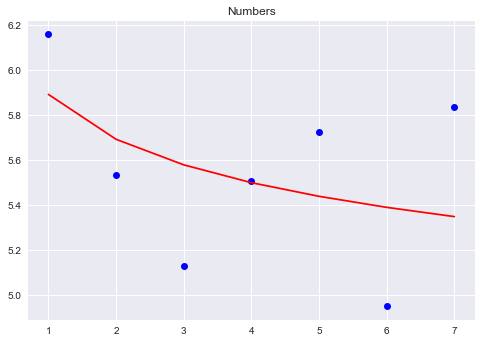

Deuteronomy r-squared: 0.09463150357620023
Deuteronomy a: 0.022396332557477496


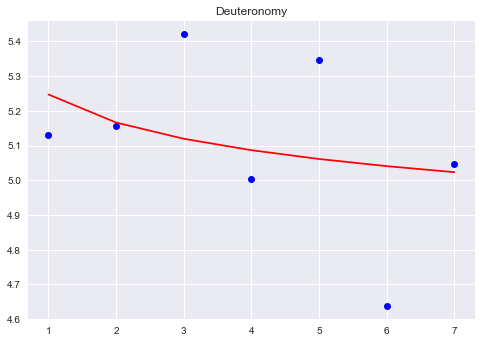

Joshua r-squared: 0.33679980335828025
Joshua a: -0.1121989414742241


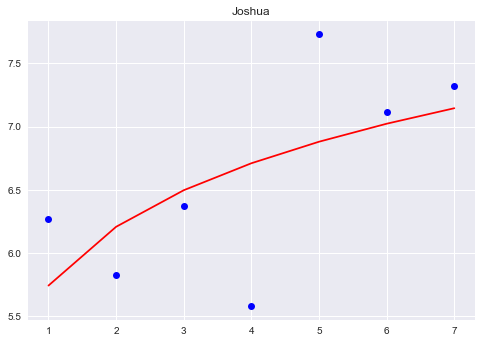

Judges r-squared: 0.642456944209495
Judges a: 0.11021307849439503


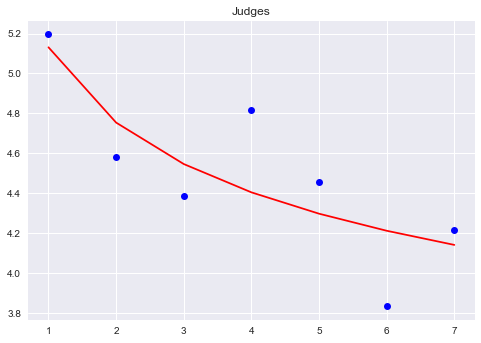

1_Samuel r-squared: 0.41529539361721945
1_Samuel a: 0.05264246628850439


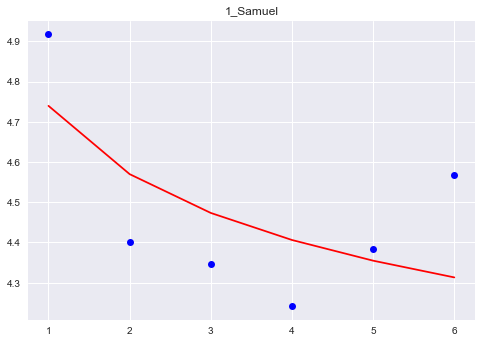

2_Samuel r-squared: 0.023608186153032847
2_Samuel a: -0.0241919995023831


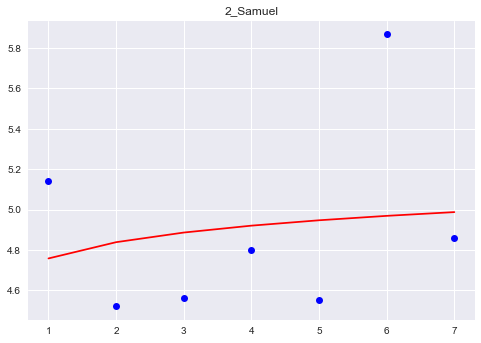

1_Kings r-squared: 0.11455047864863593
1_Kings a: -0.06190612600497078


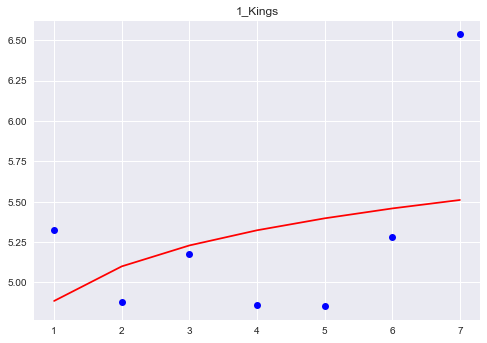

2_Kings r-squared: 0.37260558432786606
2_Kings a: -0.10338786182069262


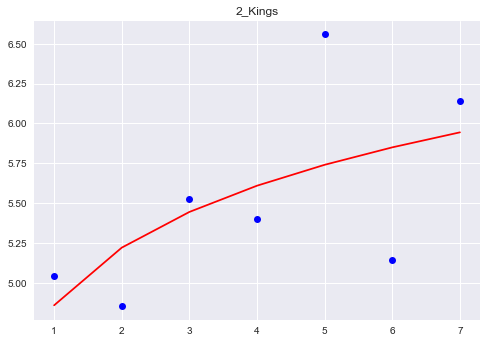

Isaiah r-squared: 0.011777202082894365
Isaiah a: -0.008177857706729769


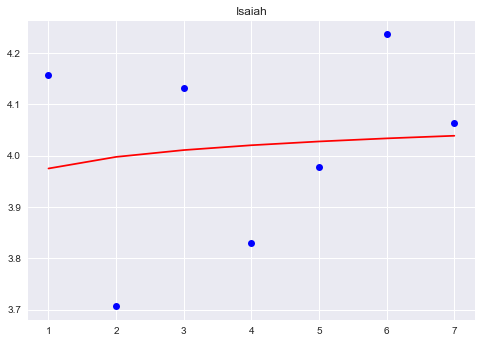

Jeremiah r-squared: 0.4833202502827571
Jeremiah a: -0.07882823630908434


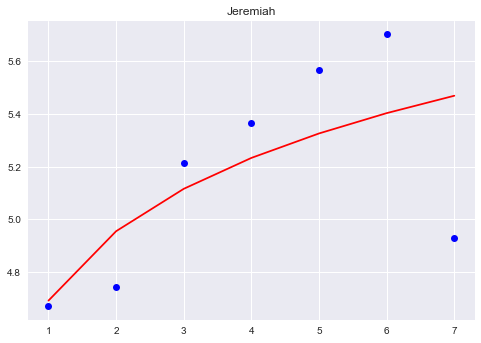

Ezekiel r-squared: 0.00016807827931872294
Ezekiel a: 0.0005100085086208254


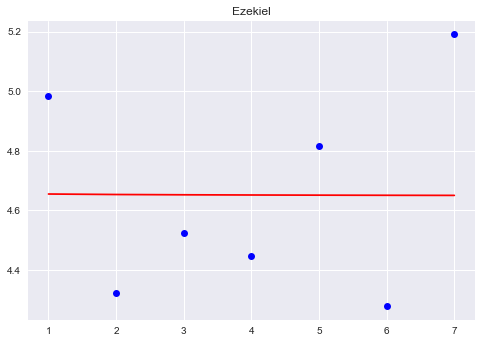

Hosea r-squared: 0.7643345489960314
Hosea a: 0.19703626427896487


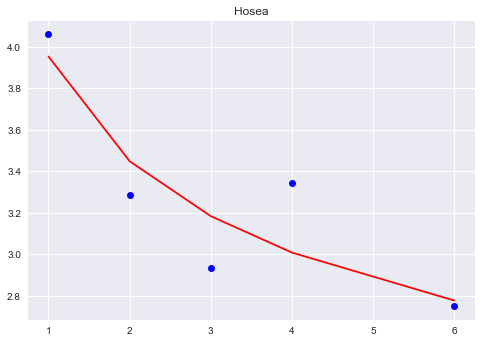

Joel r-squared: 0.355914830191423
Joel a: -0.15214065846643335


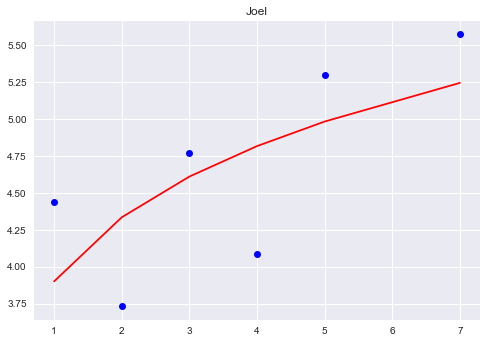

Amos r-squared: 0.3818802718032517
Amos a: 0.07430478125813374


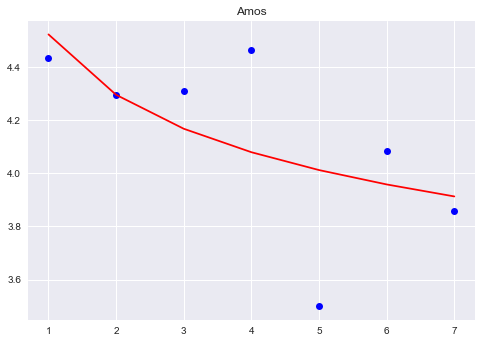

Obadiah r-squared: 0.0005478220746632146
Obadiah a: -0.005954288055016166


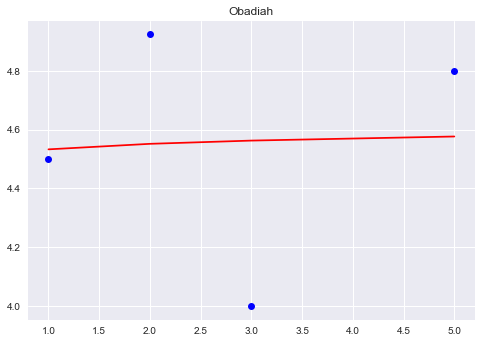

Jonah r-squared: 0.004808311661672144
Jonah a: -0.01673081020544633


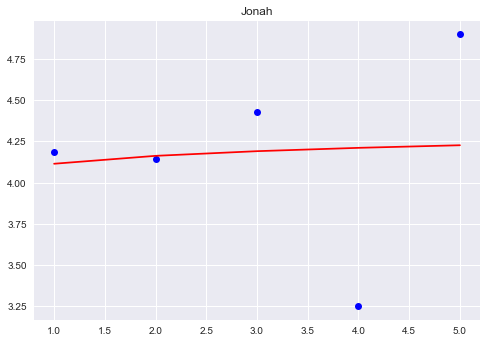

Micah r-squared: 0.028518697738023516
Micah a: 0.04190951516438397


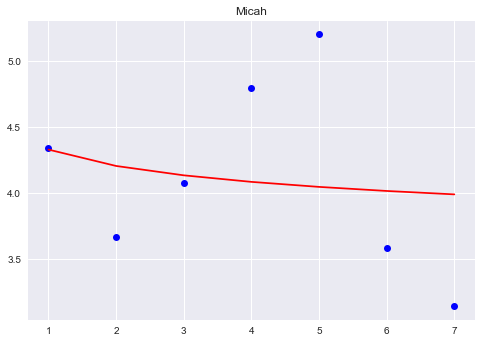

Nahum r-squared: 0.6439633906235622
Nahum a: 0.07836319099106176


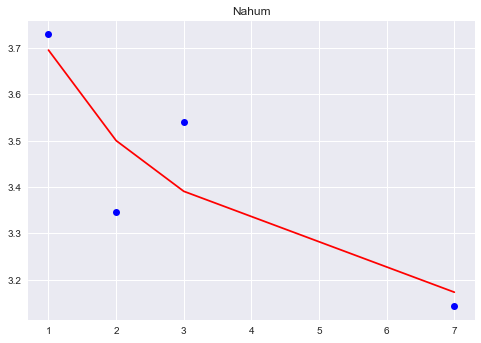

Habakkuk r-squared: 0.3618506204257259
Habakkuk a: 0.1904742838406683


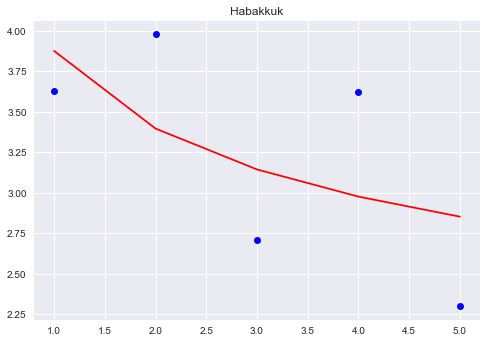

Zephaniah r-squared: 0.04178003646896302
Zephaniah a: -0.04083431297075173


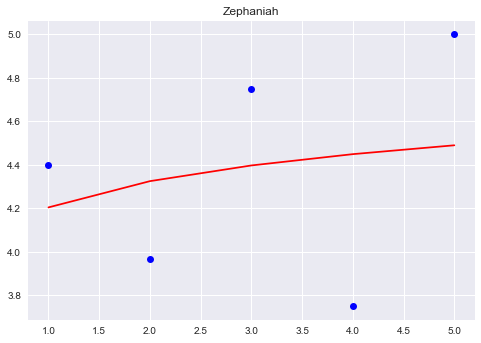

Haggai r-squared: 0.990528313631553
Haggai a: -0.2737199687975337


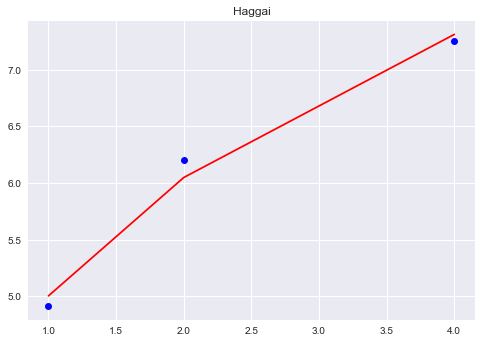

Zechariah r-squared: 0.09126036522186948
Zechariah a: -0.041910121075606446


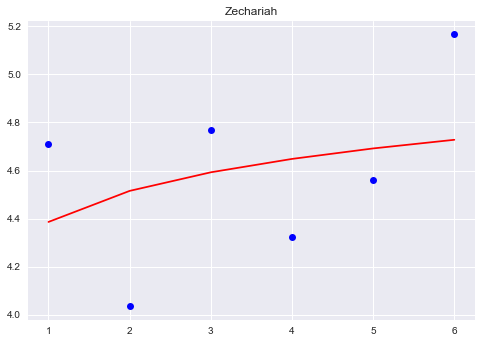

Malachi r-squared: 0.33183459873946175
Malachi a: -0.23205206637211512


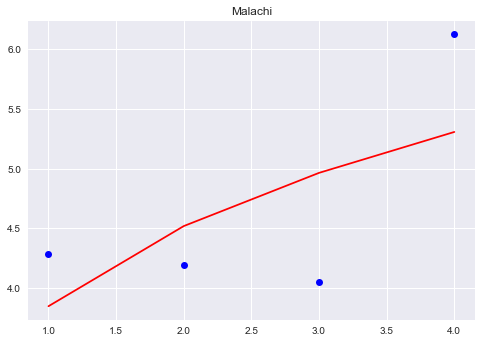

Psalms r-squared: 0.10999449890465647
Psalms a: -0.031456512106844914


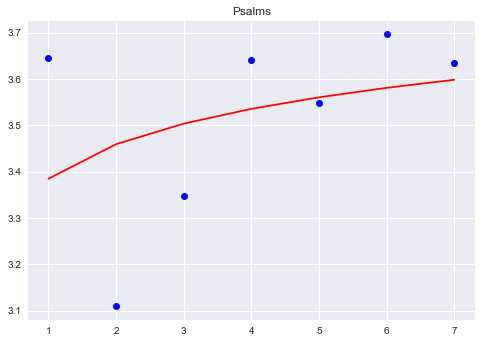

Job r-squared: 0.047339275374674375
Job a: -0.00967734532377699


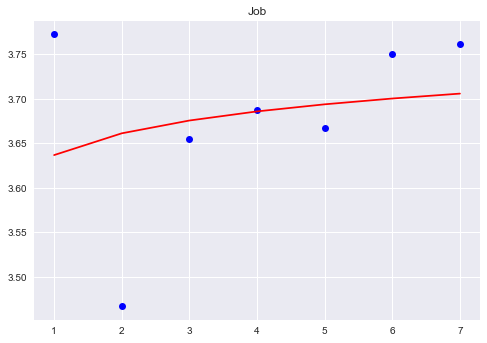

Proverbs r-squared: 0.23763241323436968
Proverbs a: 0.06944167176476372


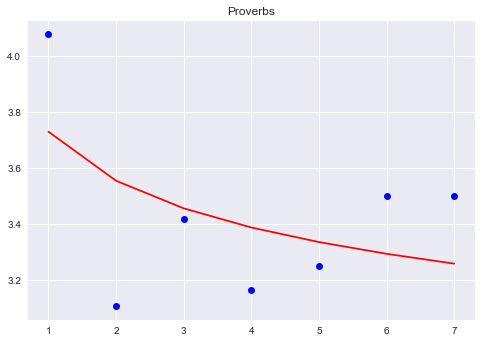

Ruth r-squared: 0.11383267467518826
Ruth a: -0.1423600975685949


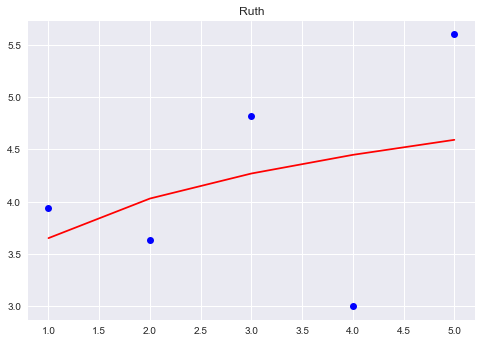

Song_of_songs r-squared: 0.16839716222521303
Song_of_songs a: -0.05997177633646194


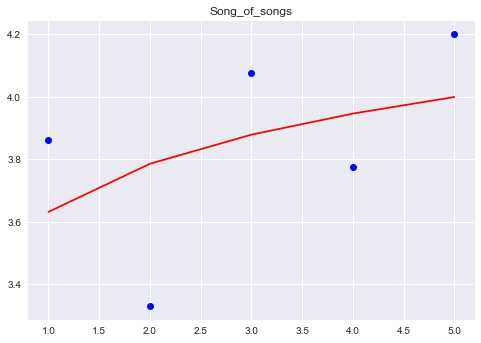

Ecclesiastes r-squared: 0.0412005352443331
Ecclesiastes a: 0.03219485815105107


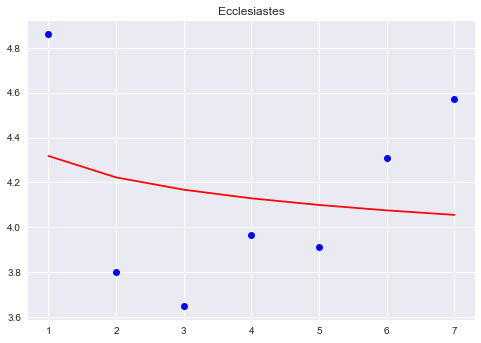

Lamentations r-squared: 0.024846438515184064
Lamentations a: -0.036604981491946034


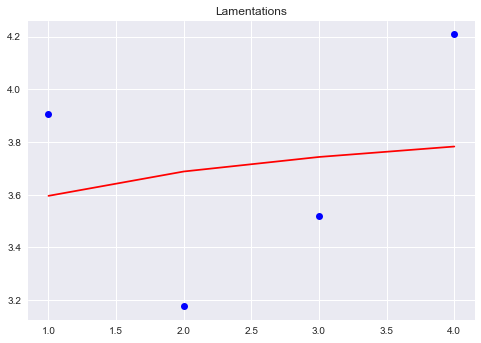

Esther r-squared: 0.018472859911776877
Esther a: -0.03118488534685762


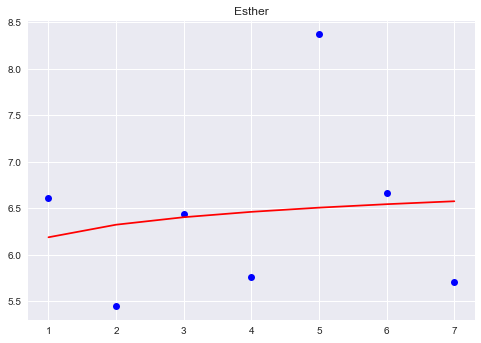

Daniel r-squared: 0.007314488034415872
Daniel a: 0.010789036156041053


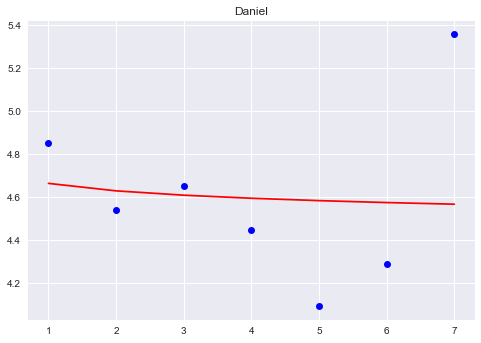

Ezra r-squared: 0.216477722193164
Ezra a: 0.05348013362575356


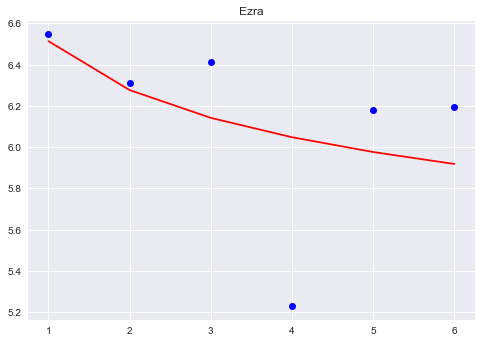

Nehemiah r-squared: 0.0008115787128419058
Nehemiah a: -0.007262178157513032


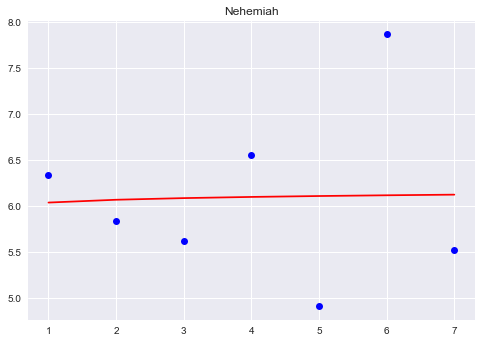

1_Chronicles r-squared: 0.27630525770602055
1_Chronicles a: -0.20892225202070316


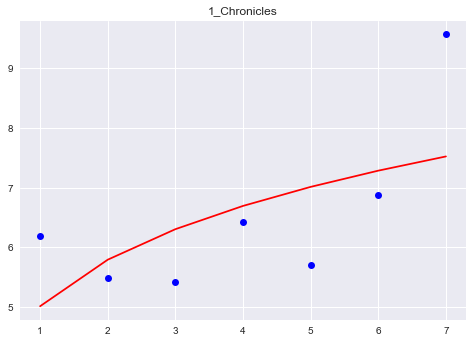

2_Chronicles r-squared: 0.17887465479720502
2_Chronicles a: -0.07566173451211959


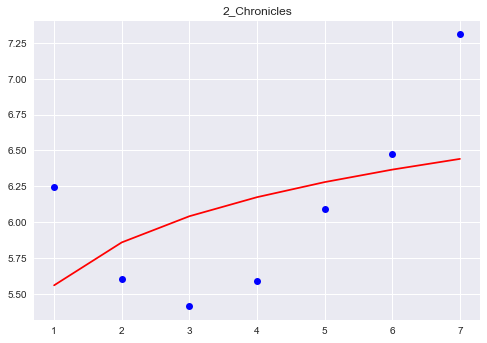

In [27]:
r2 = {}
variable_a = {}
variable_b = {}

for book in sen_len.book.unique():
    ma = sen_len_7.loc[sen_len_7['book'] == book].clause_length.groupby(sen_len_7.sentence_length).mean()
    ma_df = pd.DataFrame(ma)
    ma_df.reset_index(level=0, inplace=True)
     
    y = ma_df.clause_length
    x = ma_df.sentence_length

    def mla(x, a, b):
        return (a*(1/x**b))

    mlamodel = Model(mla)
    result = mlamodel.fit(y, x=x, a=4.950447, b=0.228)

    SenLp = []
    for n in range(1,32):
        SenLp.append(a*(1/n**-b))

    SenLp_df = pd.DataFrame(SenLp)
    ma_df['senlp'] = SenLp_df
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(ma_df.clause_length, ma_df.senlp)
    print(book, "r-squared:", r_value**2)
    r2[book] = r_value**2
    v_a = result.params['a'].value
    v_b = result.params['b'].value
    variable_a[book] = v_a
    variable_b[book] = v_b
    print(book, 'a:',v_b)

    
    plt.plot(x, y, 'bo')
    plt.plot(x, result.best_fit, 'r-')
    plt.title(book)
    plt.show()

In [28]:
sen_clause = pd.DataFrame(list(r2.items()), columns=['Book', 'R2'])
sen_clause['variable_a'] = sen_clause['Book'].map(variable_a)
sen_clause['variable_b'] = sen_clause['Book'].map(variable_b)
sen_clause

,Book,R2,variable_a,variable_b
0,Genesis,0.125592,4.724215,-0.030671
1,Exodus,0.168653,4.947813,-0.140564
2,Leviticus,0.000347,5.426432,-0.003642
3,Numbers,0.206603,5.893460,0.049658
4,Deuteronomy,0.094632,5.247083,0.022396
5,Joshua,0.336800,5.743848,-0.112199
6,Judges,0.642457,5.131037,0.110213
7,1_Samuel,0.415295,4.739626,0.052642
8,2_Samuel,0.023608,4.757790,-0.024192
9,1_Kings,0.114550,4.884802,-0.061906


# Individual Books

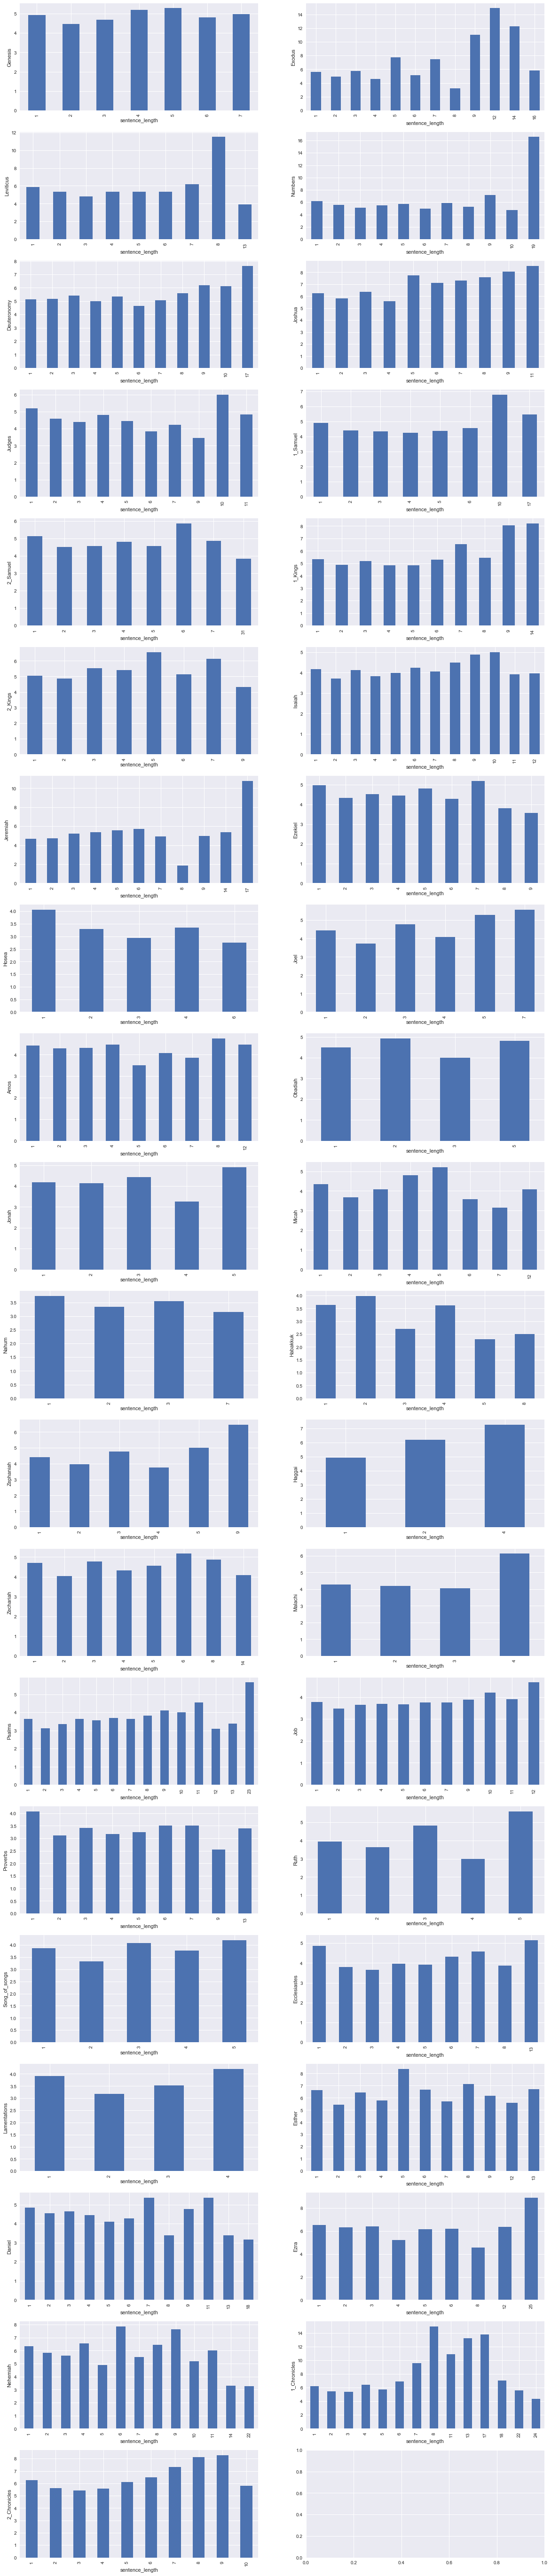

In [29]:
fig, axes = plt.subplots(nrows=20, ncols=2, figsize=(20,100))
axes_list = [item for sublist in axes for item in sublist] 


for book in sen_len.book.unique():
    ax1 = axes_list.pop(0)
    ax1.set_ylabel(book)
    sen_len[sen_len['book'] == book].clause_length.groupby(sen_len.sentence_length).mean().plot(kind='bar', ax=ax1)

plt.show()

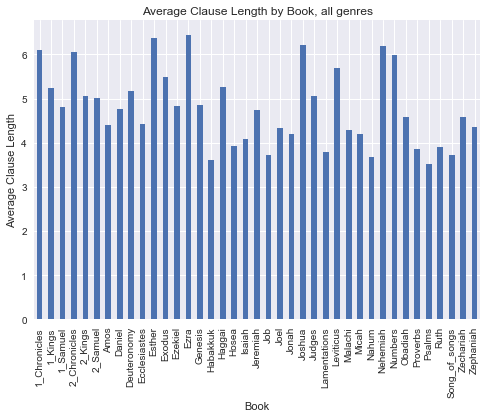

In [30]:
sen_len.clause_length.groupby(sen_len.book).mean().plot(kind='bar')
plt.xlabel('Book')
plt.ylabel('Average Clause Length')
plt.title('Average Clause Length by Book, all genres')
plt.show()

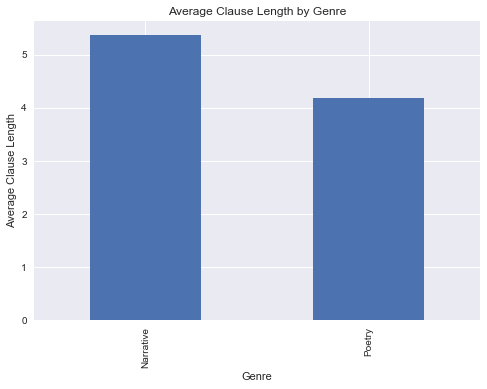

In [31]:
sen_len.clause_length.groupby(sen_len.genre).mean().plot(kind='bar')
for p in ax1.patches: ax1.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Genre')
plt.ylabel('Average Clause Length')
plt.title('Average Clause Length by Genre')
plt.show()

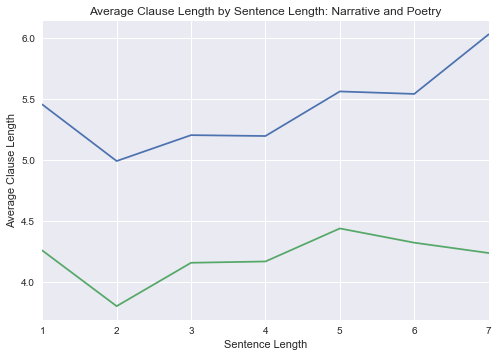

In [32]:
sen_len_7.loc[sen_len_7.genre == 'Narrative'].clause_length.groupby(sen_len.sentence_length).mean().plot(kind='line')
sen_len_7.loc[sen_len_7.genre == 'Poetry'].clause_length.groupby(sen_len.sentence_length).mean().plot(kind='line')

plt.xlabel('Sentence Length')
plt.ylabel('Average Clause Length')
plt.title('Average Clause Length by Sentence Length: Narrative and Poetry')
plt.show()

# Begin Clause length analysis:

In [33]:
clause_list = []
clause_dict = {}

number_phrases = []
number_words2 = []
phrase_word_ratio = []

for cl in F.otype.s('clause'):
    phrases = L.d(cl, 'phrase')
    phr_counter2 = 0
    
    for phr in phrases:
        phr_counter2 += 1
        
    all_words = L.d(cl, 'word')
    word_counter = 0
    
    for w in all_words:  
        word_counter += 1
        
    info_list2 = [str(cl)]
    
    where = T.sectionFromNode(cl)
    for elem in where:
        info_list2.append(str(elem))
    words2 = L.d(cl, 'word')
    lang2 = F.language.v(words[0])
    info_list2.append(lang2)
    info_list2.append(str(phr_counter2))
    number_phrases.append(phr_counter2)
    info_list2.append(str(word_counter))
    number_words2.append(word_counter)
    info_list2.append(str(word_counter / phr_counter2))
    phrase_word_ratio.append(word_counter / phr_counter2)

    
    clause_list.append(cl)
    clause_dict[cl] = info_list2

In [34]:
csvh = open('clause_jarod.csv', "w")
header = ['id', 'book', 'chapter', 'verse', 'language', 'number_phrases', 'number_words', 'ratio']
csvh.write('{}\n'.format(','.join(header)))
for cl in clause_list:
    line = clause_dict[cl]
    csvh.write('{}\n'.format(','.join(line)))
    
csvh.close()

In [35]:
cl_len = pd.read_csv('/Users/jAir/Desktop/SBL Presentations/2018 LBH/clause_jarod.csv')

FileNotFoundError: File b'/Users/jAir/Desktop/SBL Presentations/2018 LBH/clause_jarod.csv' does not exist

In [ ]:
cl_len

In [ ]:
narrative = {'Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges', '1_Samuel', '2_Samuel', 
             '1_Kings', '2_Kings', '1_Chronicles', '2_Chronicls', 'Ruth', 'Esther', 'Ezra', 'Nehemiah', 'Jonah', 'Daniel'}

conditions = [
    (cl_len['book'] == 'Genesis'),
    (cl_len['book'] == 'Exodus'),
    (cl_len['book'] == 'Leviticus'),
    (cl_len['book'] == 'Numbers'),
    (cl_len['book'] == 'Deuteronomy'),
    (cl_len['book'] == 'Joshua'),
    (cl_len['book'] == 'Judges'),
    (cl_len['book'] == '1_Samuel'),
    (cl_len['book'] == '2_Samuel'),
    (cl_len['book'] =='1_Kings'),
    (cl_len['book'] =='2_Kings'),
    (cl_len['book'] =='1_Chronicles'),
    (cl_len['book'] =='2_Chronicles'),
    (cl_len['book'] == 'Ruth'),
    (cl_len['book'] =='Esther'),
    (cl_len['book'] =='Ezra'),
    (cl_len['book'] =='Nehemiah'),
    (cl_len['book'] =='Jonah'),
    (cl_len['book'] =='Daniel')]
choices = ['Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative',
          'Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative','Narrative',]


cl_len['genre'] = np.select(conditions, choices, default = 'Poetry')
cl_len

In [ ]:
cl_len.groupby('number_phrases').number_phrases.count()

In [ ]:
cl_len.hist(column = 'number_phrases', bins = (cl_len['number_phrases'].max()))
plt.show()

In [ ]:
sns.boxplot(x='number_phrases', y='ratio', data=cl_len)
plt.show()

In [ ]:
print(pearsonr(cl_len.number_phrases,cl_len.ratio))

print(np.corrcoef(cl_len.number_phrases,cl_len.ratio))

In [ ]:
plt.scatter(cl_len.number_phrases,cl_len.ratio)
plt.title("Menzerath's Law: Clause Length and Phrase Length in Ancient Hebrew")
plt.xlabel("Clause Length")
plt.ylabel("Phrase Length")
plt.show()

In [ ]:
cl_len.ratio.groupby(number_phrases).mean().plot(kind='line')
plt.show()

In [ ]:
cl_len.ratio.groupby(cl_len.book).mean().plot(kind='bar')
plt.show()

In [ ]:
ax1 = cl_len.ratio.groupby(cl_len.genre).mean().plot(kind='bar')
for p in ax1.patches: ax1.annotate(np.round(p.get_height(),decimals=2), 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
cl_len.loc[cl_len.genre == 'Narrative'].ratio.groupby(cl_len.number_phrases).mean().plot(kind='line')
plt.show()

In [ ]:
print(pearsonr(cl_len.loc[cl_len.genre == 'Narrative'].number_phrases, cl_len.loc[cl_len.genre == 'Narrative'].ratio))

print(np.corrcoef(cl_len.loc[cl_len.genre == 'Narrative'].number_phrases, cl_len.loc[cl_len.genre == 'Narrative'].ratio))

In [ ]:
cl_len.loc[cl_len.genre == 'Poetry'].ratio.groupby(cl_len.number_phrases).mean().plot(kind='line')
plt.show()

In [ ]:
print(pearsonr(cl_len.loc[cl_len.genre == 'Poetry'].number_phrases, cl_len.loc[cl_len.genre == 'Poetry'].ratio))

print(np.corrcoef(cl_len.loc[cl_len.genre == 'Poetry'].number_phrases, cl_len.loc[cl_len.genre == 'Poetry'].ratio))

# Begin phrase analysis

In [ ]:
phrase_list = []
phrase_dict = {}

number_phrases = []
number_words3 = []
word_letter_ratio = []

for phr in F.otype.s('phrase'):
    words = L.d(phr, 'word')
    word_counter = 0
    
    for word in words:  
        word_counter += 1
            
    all_letters = sum([len(F.g_cons.v(word)) for word in words])

    info_list3 = [str(phr)]
    
    where = T.sectionFromNode(phr)
    for elem in where:
        info_list3.append(str(elem))
    words3 = L.d(phr, 'word')
    lang3 = F.language.v(words3[0])
    info_list3.append(lang3)
    info_list3.append(str(word_counter))
    number_phrases.append(word_counter)
    info_list3.append(str(all_letters))
    number_words3.append(all_letters)
    info_list3.append(str(all_letters / word_counter))
    word_letter_ratio.append(all_letters / word_counter)

    
    phrase_list.append(phr)

    phrase_dict[phr] = info_list3

In [ ]:
csvh = open('phrase_jarod.csv', "w")
header = ['id', 'book', 'chapter', 'verse', 'language', 'phrase_length', 'number_letters', 'word_length']
csvh.write('{}\n'.format(','.join(header)))
for phr in phrase_list:
    line = phrase_dict[phr]
    csvh.write('{}\n'.format(','.join(line)))
    
csvh.close()

In [ ]:
phr_len = pd.read_csv('/Users/jAir/Desktop/ipynb/phrase_jarod.csv')

In [ ]:
phr_len.head()

In [ ]:
sum(phr_len.number_letters)

In [ ]:
phr_len.groupby('phrase_length').phrase_length.count()

In [ ]:
plt.scatter(phr_len.phrase_length, phr_len.word_length)
plt.title("Menzerath's Law: Sentence Length and Clause Length in Ancient Hebrew")
plt.xlabel("Sentence Length")
plt.ylabel("Clause Length")
plt.show()

In [ ]:
phr_len.word_length.groupby(phr_len.phrase_length).mean().plot(kind='line')
plt.xlabel('Sentence Length')
plt.ylabel('Average Clause Length')
plt.title('Average Clause Length by Sentence Length, all genres')
plt.show()

In [ ]:
phr_len_20 = phr_len[phr_len['phrase_length'] < 21]

In [ ]:
phr_len_20.word_length.groupby(phr_len.phrase_length).mean().plot(kind='line')
plt.xlabel('Phrase Length')
plt.ylabel('Average Word Length')
plt.title('Average Phrase Length by Word Length, all genres')
plt.show()

In [ ]:
ma_phr = phr_len_20.word_length.groupby(phr_len_20.phrase_length).mean()
ma_phr_df = pd.DataFrame(ma_phr)
ma_phr_df.reset_index(level=0, inplace=True)
ma_phr_df.head()

y = ma_phr_df.word_length
x = ma_phr_df.phrase_length

def mla(x, a, b):
    return (a*(1/x**b))

mlamodel = Model(mla)
result = mlamodel.fit(y, x=x, a=2.9, b=0.228)

print(result.fit_report())

plt.plot(x, y, 'bo')
plt.plot(x, result.best_fit, 'r-')
plt.show()

In [ ]:
a_phr = result.params['a'].value
b_phr = result.params['b'].value

SenLp = []

for n in range(1,38):
    SenLp.append(a_phr*(1/n**-b_phr))

SenLp_df = pd.DataFrame(SenLp)
ma_phr_df['senlp'] = SenLp_df

slope, intercept, r_value, p_value, std_err = stats.linregress(ma_phr_df.word_length, ma_phr_df.senlp)
print("r-squared:", r_value**2)

In [ ]:
r2p = {}
variable_ap = {}
variable_bp = {}

for book in phr_len.book.unique():
    ma = phr_len_20.loc[phr_len_20['book'] == book].word_length.groupby(phr_len_20.phrase_length).mean()
    ma_df = pd.DataFrame(ma)
    ma_df.reset_index(level=0, inplace=True)
     
    y = ma_df.word_length
    x = ma_df.phrase_length

    def mla(x, a, b):
        return (a*(1/x**b))

    mlamodel = Model(mla)
    result = mlamodel.fit(y, x=x, a=4.950447, b=0.228)

    SenLp = []
    for n in range(1,32):
        SenLp.append(a*(1/n**-b))

    phrLp_df = pd.DataFrame(SenLp)
    ma_df['phrlp'] = phrLp_df
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(ma_df.word_length, ma_df.phrlp)
    print(book, "r-squared:", r_value**2)
    r2[book] = r_value**2
    v_a = result.params['a'].value
    v_b = result.params['b'].value
    variable_a[book] = v_a
    variable_b[book] = v_b
    print(book, 'a:',v_b)

    
    plt.plot(x, y, 'bo')
    plt.plot(x, result.best_fit, 'r-')
    plt.title(book)
    plt.show()

In [ ]:
phr_word = pd.DataFrame(list(r2.items()), columns=['Book', 'R2'])
phr_word['variable_a'] = phr_word['Book'].map(variable_a)
phr_word['variable_b'] = phr_word['Book'].map(variable_b)
phr_word

In [ ]:
ma_phr_df